In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD

C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


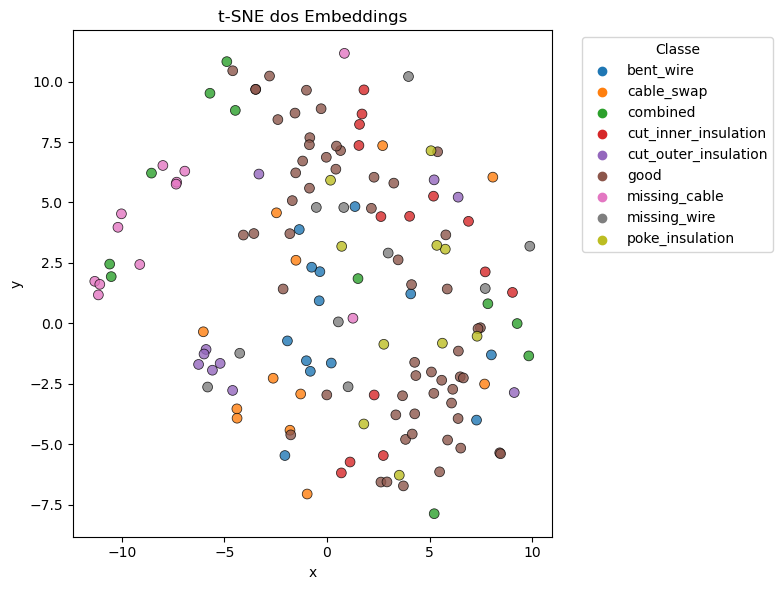

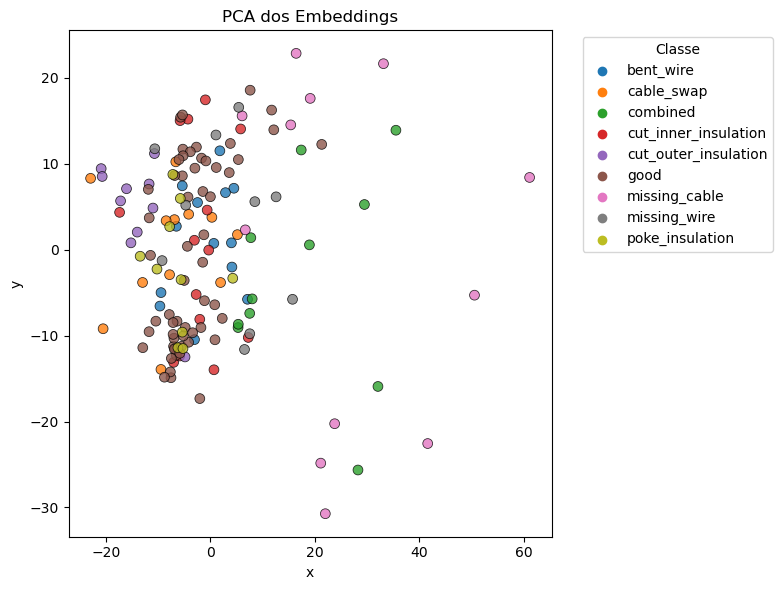

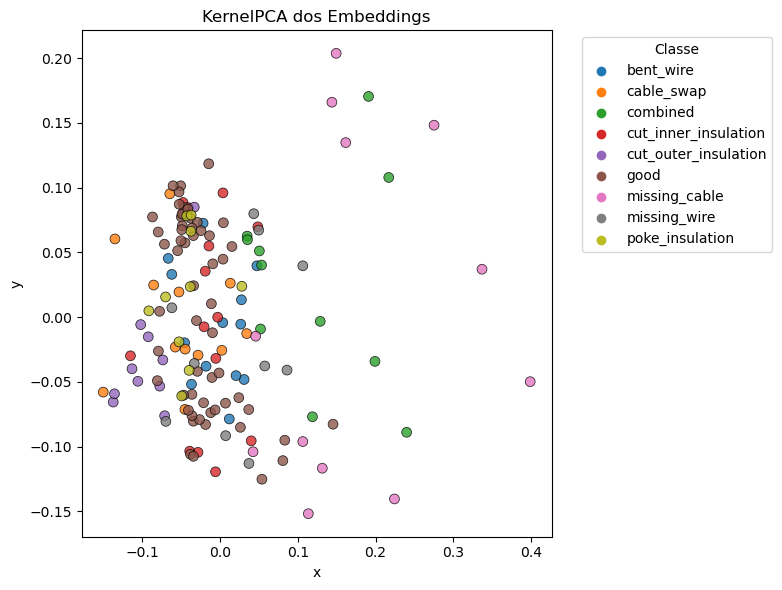

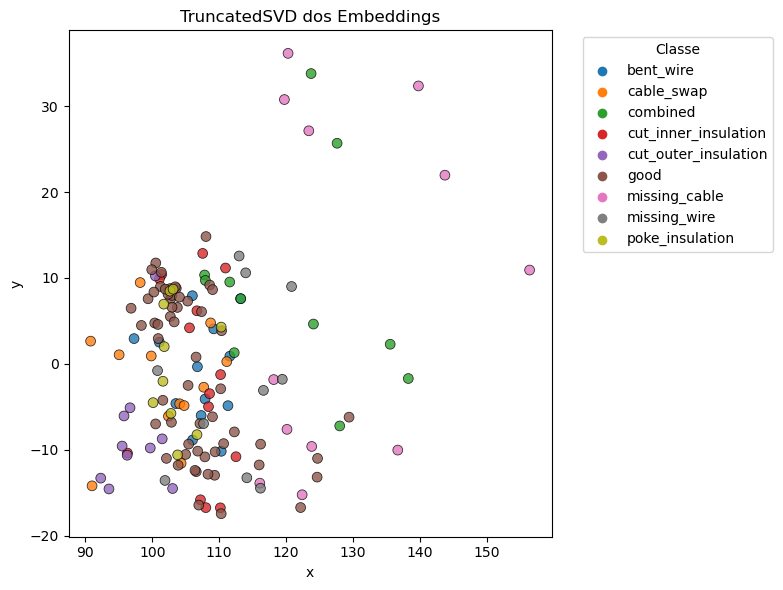

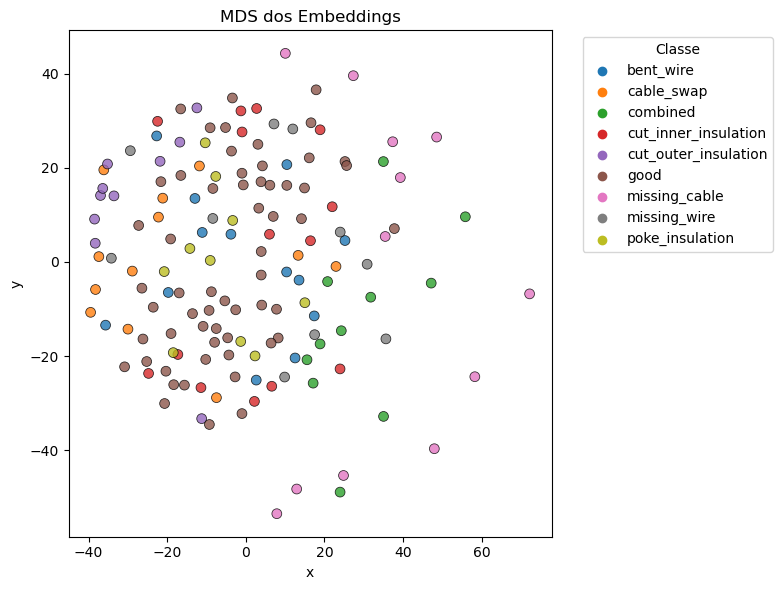

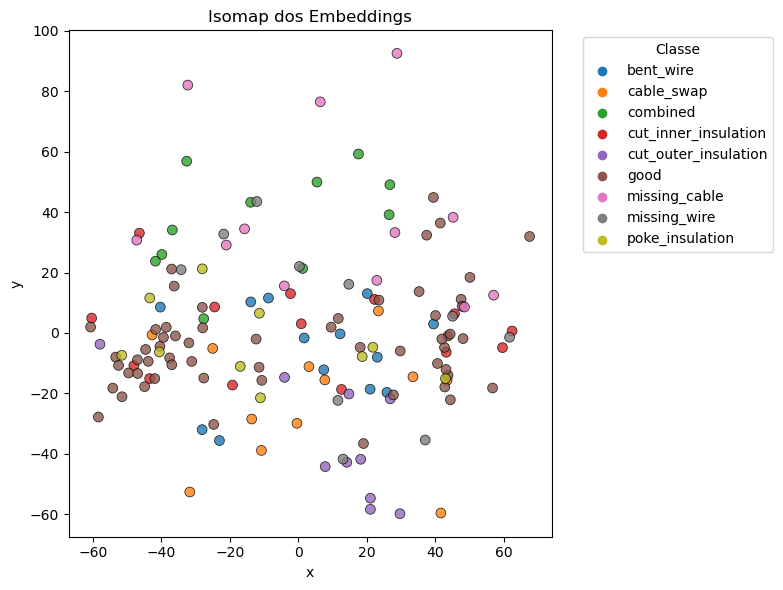

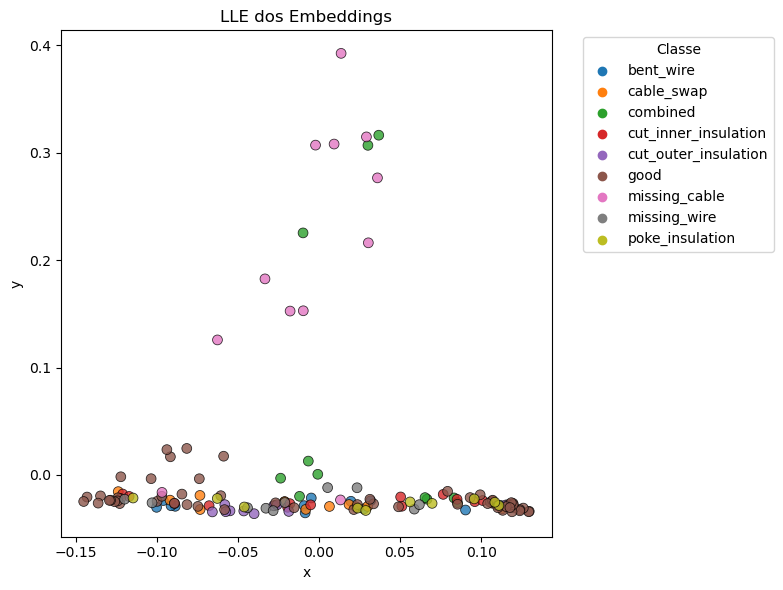

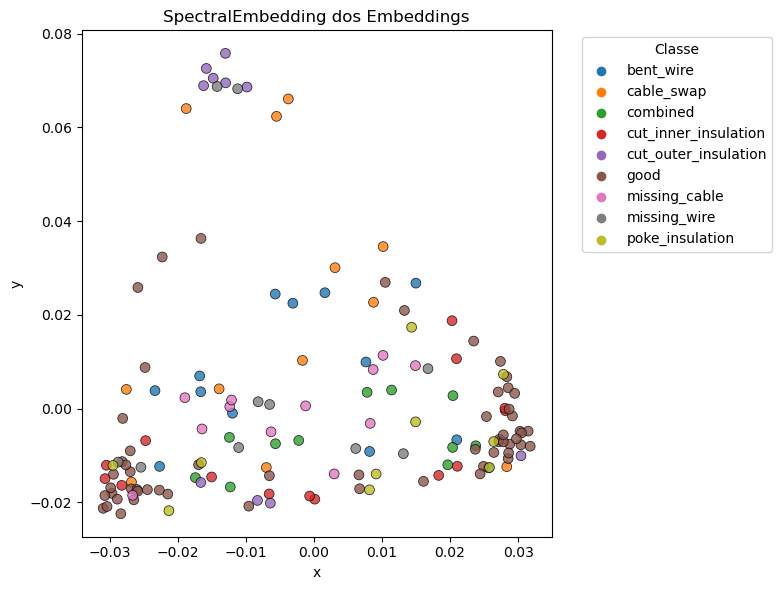

In [27]:
df = pd.read_csv("embeddings_rede.csv")
features = df.drop(columns="label").values
labels = df["label"].values

def plot_embedding(df_emb, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_emb, x="x", y="y", hue="label", palette="tab10", s=50, alpha=0.8, edgecolor="k")
    plt.title(title)
    plt.legend(title="Classe", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()

embedders = {
    "t-SNE": TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42),
    "PCA": PCA(n_components=2, random_state=42),
    "KernelPCA": KernelPCA(n_components=2, kernel="rbf", random_state=42),
    "TruncatedSVD": TruncatedSVD(n_components=2, random_state=42),
    "MDS": MDS(n_components=2, random_state=42),
    "Isomap": Isomap(n_components=2, n_neighbors=15),
    "LLE": LocallyLinearEmbedding(n_components=2, n_neighbors=15),
    "SpectralEmbedding": SpectralEmbedding(n_components=2, n_neighbors=15)
}

for name, model in embedders.items():
    X_emb = model.fit_transform(features)
    df_emb = pd.DataFrame(X_emb, columns=["x", "y"])
    df_emb["label"] = labels
    plot_embedding(df_emb, f"{name} dos Embeddings")

plt.show()